# Exercise 2.1 - Hopfield Network

We implement a Hopfield neural network to store and retrieve binary letter patterns represented as 5×5 matrices with values {1, -1}.

The goal is to:
- Store 4 letter patterns
- Recover them from noisy versions
- Observe the convergence step by step
- Test for a spurious (non-original) state


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import imageio
import os


### Define letter patterns

In [9]:
# Define 5x5 binary letter patterns (1 and -1)
def create_patterns():
    A = np.array([[1, 1, 1, 1, 1],
                  [1, -1, -1, -1, 1],
                  [1, 1, 1, 1, 1],
                  [1, -1, -1, -1, 1],
                  [1, -1, -1, -1, 1]])

    H = np.array([[1, -1, -1, -1, 1],
                  [1, -1, -1, -1, 1],
                  [1, 1, 1, 1, 1],
                  [1, -1, -1, -1, 1],
                  [1, -1, -1, -1, 1]])

    J = np.array([[1, 1, 1, 1, 1],
                  [-1, -1, -1, -1, 1],
                  [-1, -1, -1, -1, 1],
                  [1, -1, -1, -1, 1],
                  [1, 1, 1, 1, 1]])

    T = np.array([[1, 1, 1, 1, 1],
                  [-1, -1, 1, -1, -1],
                  [-1, -1, 1, -1, -1],
                  [-1, -1, 1, -1, -1],
                  [-1, -1, 1, -1, -1]])

    return [A, H, J, T]

patterns = create_patterns()


### Help functions + Noise addition

In [10]:
def show_array(x, side=5):
    plt.imshow(x.reshape(side, side), cmap='gray', vmin=-1, vmax=1)
    plt.axis('off')
    plt.show()

def show_multiple_arraysi(arrays, side=5):
    fig, axes = plt.subplots(1, len(arrays), figsize=(len(arrays) * 2, 2))
    for i, ax in enumerate(axes):
        ax.imshow(arrays[i].reshape(side, side), cmap='gray', vmin=-1, vmax=1)
        ax.axis('off')
    plt.show()

def add_noise(x, flip_fraction):
    x_noisy = x.copy()
    n_flip = max(1, int(len(x) * flip_fraction))
    flip_indices = np.random.choice(len(x), n_flip, replace=False)
    x_noisy[flip_indices] *= -1
    return x_noisy

### Hopfield

In [11]:
def train_hopfield(X):
    """
    Trains a Hopfield network using Hebbian learning.

    Parameters:
    - X: a 2D NumPy array where each row is a flattened binary pattern (values should be -1 or 1).

    Returns:
    - W: the weight matrix of the Hopfield network.
    """
    n = X.shape[1]  # Number of neurons (one per pixel)
    W = np.zeros((n, n))  # Initialize weight matrix

    for x in X:
        W += np.outer(x, x)  # Hebbian learning: strengthen connections between co-active neurons

    np.fill_diagonal(W, 0)  # No self-connections
    return W / X.shape[0]   # Normalize by number of patterns to prevent weight saturation


def hopfield_recall(x0, W, steps=100):
    x = x0.copy()
    history = [x.copy()]
    n = len(x)

    for _ in range(steps):
        indices = np.random.permutation(n)
        for i in indices:
            raw = np.dot(W[i], x)
            x[i] = 1 if raw >= 0 else -1
        if np.array_equal(x, history[-1]):
            break
        history.append(x.copy())
    return history


### Visualization

In [12]:
def plot_steps_and_gif(history, gif_name="hopfield_steps.gif", side=5):
    frames = []
    for i, state in enumerate(history):
        fig, ax = plt.subplots(figsize=(2, 2))
        ax.imshow(state.reshape(side, side), cmap='gray', vmin=-1, vmax=1)
        ax.axis('off')
        ax.set_title(f"Step {i}")
        plt.tight_layout()

        filename = f"temp_step_{i}.png"
        plt.savefig(filename, dpi=100)
        frames.append(imageio.v2.imread(filename))
        plt.close()
        os.remove(filename)

    imageio.mimsave(gif_name, frames, duration=0.8, loop=0)
    print(f"GIF saved as: {gif_name}")


### Train and run

Noisy input:


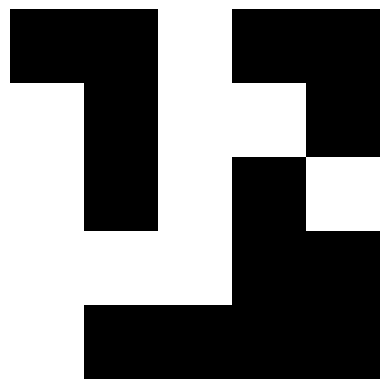

Reconstructed:


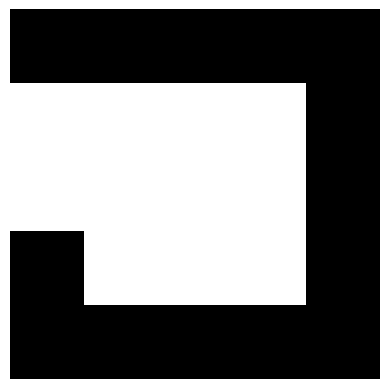

GIF saved as: hopfield_steps.gif
Likhet med original: -1.00


In [17]:
# Flatten 5x5 -> 25 and stack
X = np.array([p.flatten() for p in patterns])

# Train
W = train_hopfield(X)

# pick patterns and add noise 
idx = 2  # chosen letter
x_orig = X[idx]
x_noisy = add_noise(x_orig, flip_fraction=0.7)

print("Noisy input:")
show_array(x_noisy)

# recall
history = hopfield_recall(x_noisy, W, steps=100)

print("Reconstructed:")
show_array(history[-1])

# make GIF
plot_steps_and_gif(history, gif_name="hopfield_steps.gif", side=5)
similarity = np.dot(history[-1], x_orig) / len(x_orig)
print(f"Likhet med original: {similarity:.2f}")
